This is s really long time series. Our dates are in date fraction format, but that's fine. 

In [1]:
import pandas as pd

DATA = '/kaggle/input/cape-s-and-p-500/Schiller.csv'
df = pd.read_csv(filepath_or_buffer=DATA)
df['year'] = df['Date'].astype(int)
df['10_Year_Annualized_Bonds_RealReturn'] = df['10_Year_Annualized_Bonds_RealReturn'].apply(func=lambda x: x if isinstance(x, float) else float(x.replace('%', '')))
df['10_Year_Annualized_Stock_Real_Return'] = df['10_Year_Annualized_Stock_Real_Return'].apply(func=lambda x: x if isinstance(x, float) else float(x.replace('%', '')))
df.head()

,Date,S_and_P,Dividend,Earnings,Consumer_Price_Index,Date_Fraction,Long_Interest_Rate_GS_10,Real_Price,Real_Dividend,Real_Total_Return_Price,...,Real_TR_Scaled_Earnings,CAPE,TR_CAPE,Excess_CAPE_Yield,Monthly_Total_Bond_Returns,Real_Total_Bond_Returns,10_Year_Annualized_Stock_Real_Return,10_Year_Annualized_Bonds_RealReturn,Real_10_Year_Excess_Annualized_Returns,year
0,1871.01,4.44,0.26,0.4,12.46,1871.04,5.32,112.54,6.59,\t112.54,...,\t10.14,NaN,NaN,NaN,1.0,1.00,13.06,9.25,3.81%,1871
1,1871.02,4.50,0.26,0.4,12.84,1871.13,5.32,110.69,6.40,\t111.22,...,\t9.89,NaN,NaN,NaN,1.0,0.97,13.09,9.46,3.62%,1871
2,1871.03,4.61,0.26,0.4,13.03,1871.21,5.33,111.74,6.30,\t112.80,...,\t9.79,NaN,NaN,NaN,1.0,0.96,13.10,9.62,3.48%,1871
3,1871.04,4.74,0.26,0.4,12.56,1871.29,5.33,119.24,6.54,\t120.93,...,\t10.20,NaN,NaN,NaN,1.0,1.00,12.21,9.10,3.11%,1871
4,1871.05,4.86,0.26,0.4,12.27,1871.37,5.33,125.10,6.69,\t127.44,...,\t10.49,NaN,NaN,NaN,1.0,1.03,12.26,8.95,3.31%,1871


First let's plot the real price as a time series. Because prices have risen so much over the period of interest we need to use a log plot to capture volatility in the early years of the series.

<Axes: xlabel='Date_Fraction', ylabel='Real_Price'>

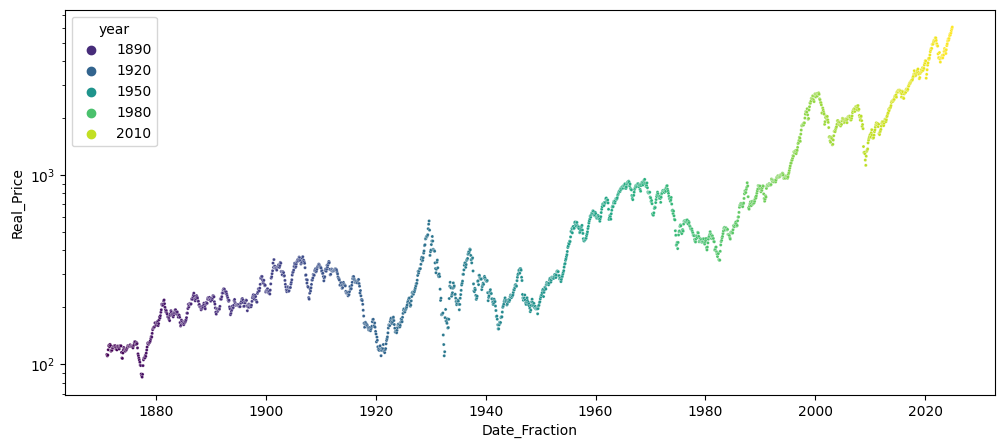

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', data=df, x='Date_Fraction', y='Real_Price', hue='year', s=5)

We can see a lot in this time series: the Long Depression of the 1870s, the Great Depression, the post-WWII economic boom, etc. 

<Axes: xlabel='Date_Fraction', ylabel='Consumer_Price_Index'>

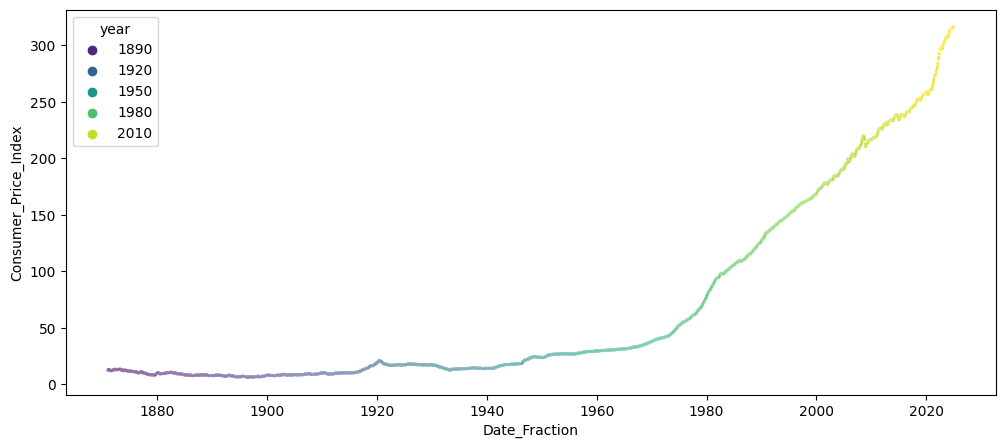

In [3]:
plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='Date_Fraction', y='Consumer_Price_Index', hue='year')

Consumer prices, on the other hand, are for the most part quiet smooth. Almost suspiciously so.

Let's look at the relationship between stocks and bonds.

<Axes: xlabel='10_Year_Annualized_Bonds_RealReturn', ylabel='10_Year_Annualized_Stock_Real_Return'>

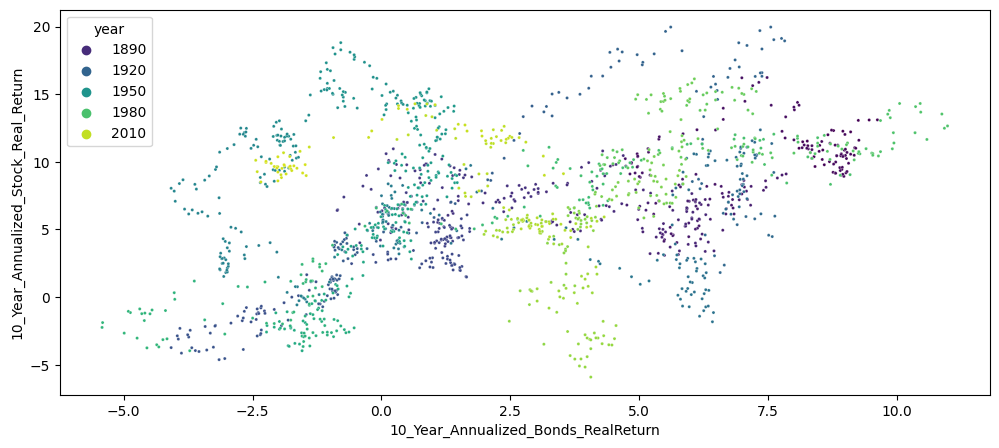

In [4]:
plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='10_Year_Annualized_Bonds_RealReturn', y='10_Year_Annualized_Stock_Real_Return', hue='year')

Because these are 10y annualized returns they tend to have some amount of serial correlation, and we see their relationship wander around the space over time. This is actually a pretty cool graph.

<Axes: xlabel='10_Year_Annualized_Bonds_RealReturn', ylabel='10_Year_Annualized_Stock_Real_Return'>

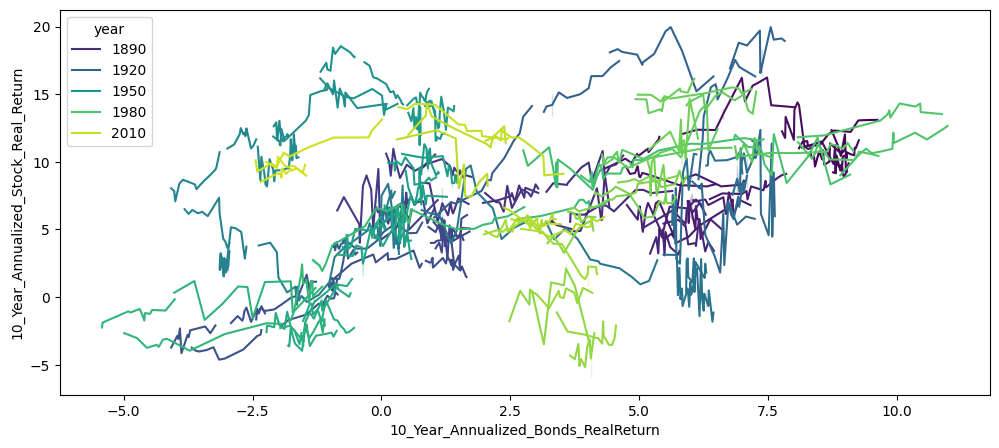

In [5]:
import warnings
from seaborn import lineplot
warnings.filterwarnings(action='ignore', category=FutureWarning)
plt.figure(figsize=FIGSIZE)
lineplot(palette='viridis',  data=df, x='10_Year_Annualized_Bonds_RealReturn', y='10_Year_Annualized_Stock_Real_Return', hue='year')

The serial correlation stands out more clearly if we use a lineplot.